In [1]:
from light_curve_util import kepler_io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Universal variables
# Directory to MAST download
KEPLER_DATA_DIR = "../light_curves/"
# Kep_ID 6862328
KEP_686 = 6862328
# Radius and Mass relative to sun
R_686 = 0.73
M_686 = 1.00
# Kep_ID 1865864
KEP_186 = 1865864
R_186 = 0.698
M_186 = 0.679

## Brightness vs. Time Kep_ID 6862328

In [3]:
file_names = kepler_io.kepler_filenames(KEPLER_DATA_DIR,KEP_686)
assert file_names, "Failed to find .fits files in {}".format(KEPLER_DATA_DIR)
all_time, all_flux = kepler_io.read_kepler_light_curve(file_names)
print("Read light curve with {} segments".format(len(all_time)))

Read light curve with 17 segments


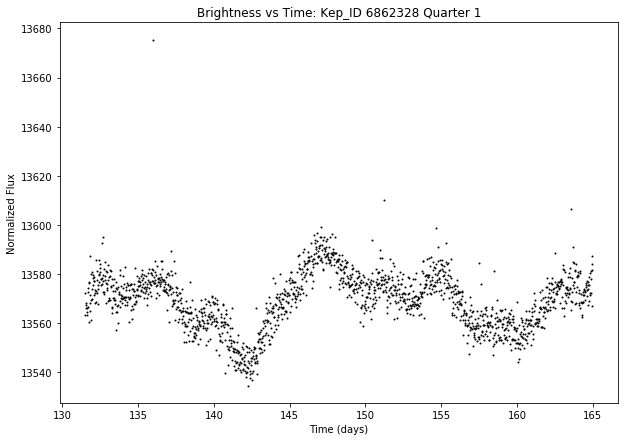

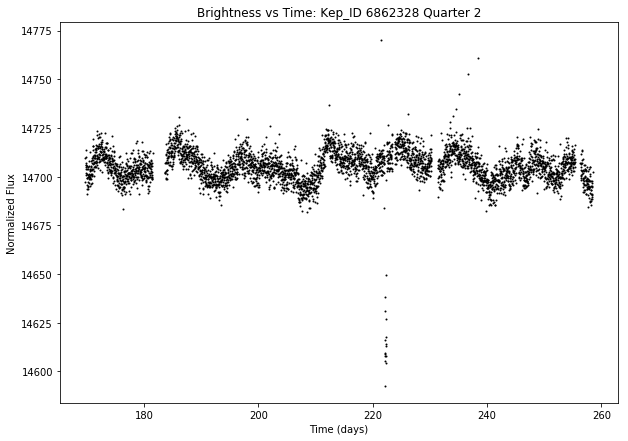

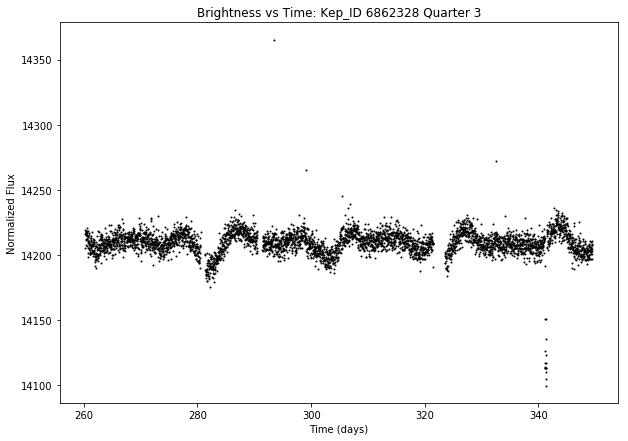

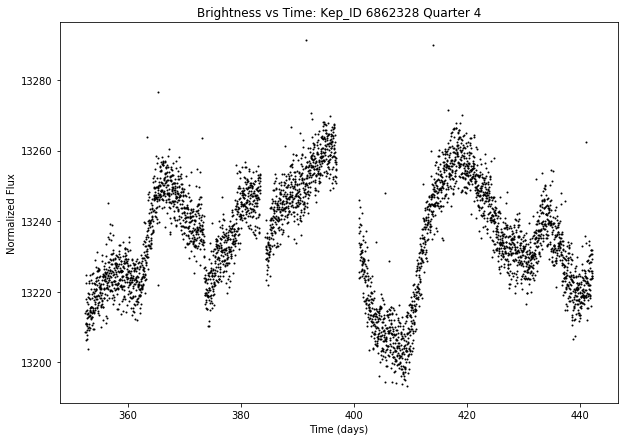

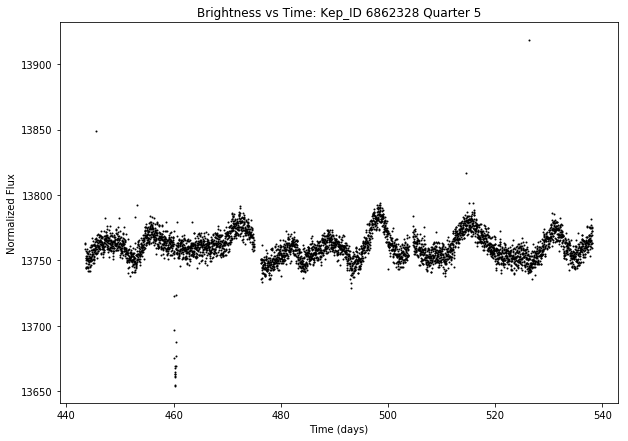

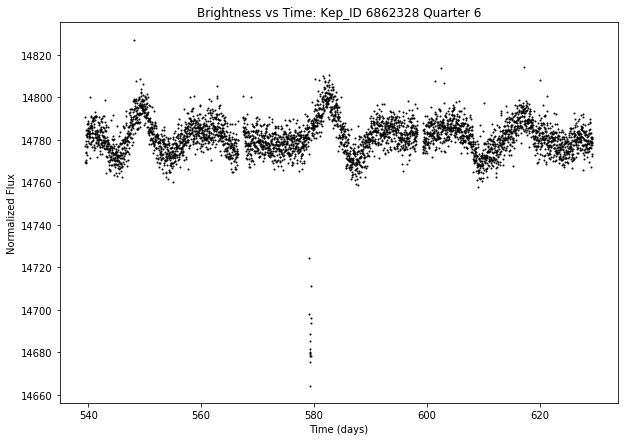

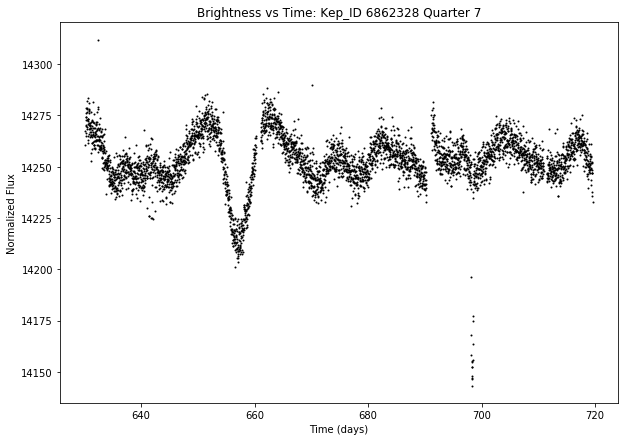

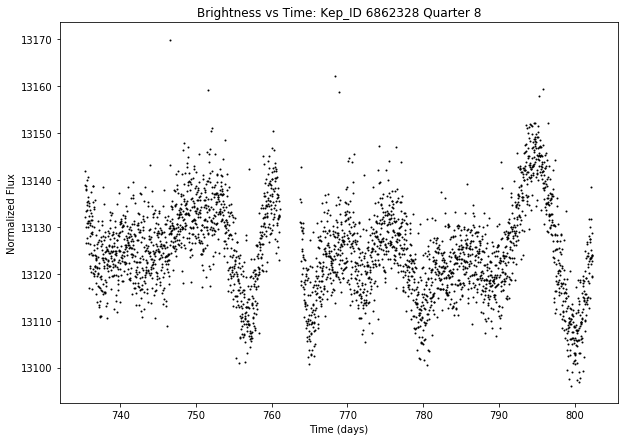

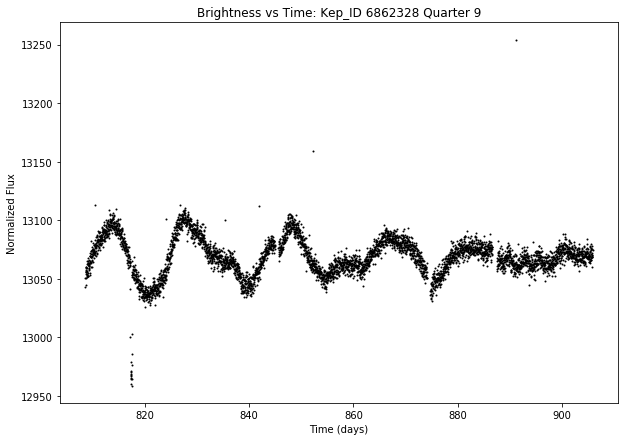

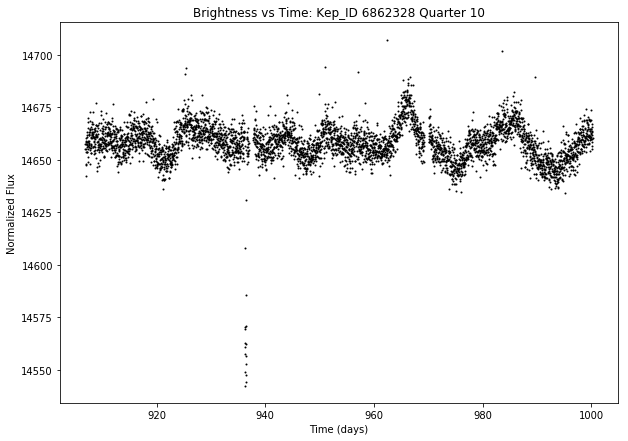

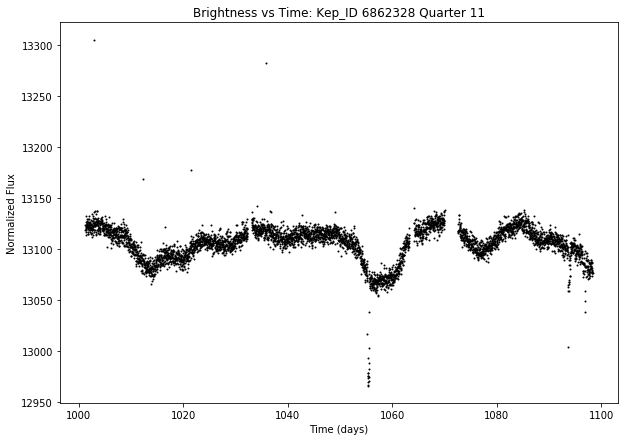

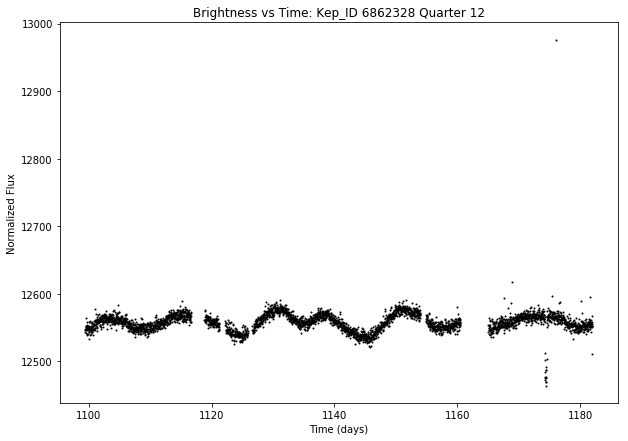

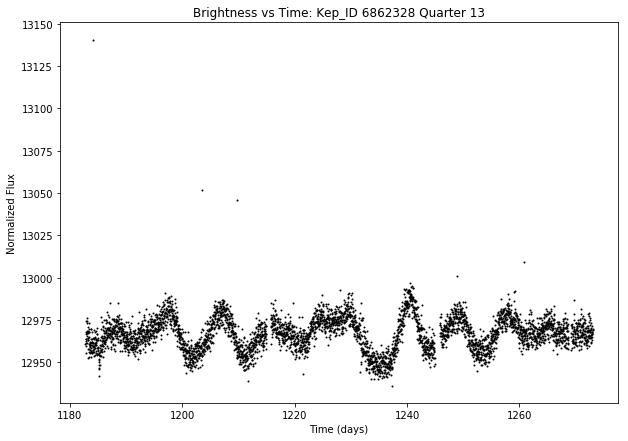

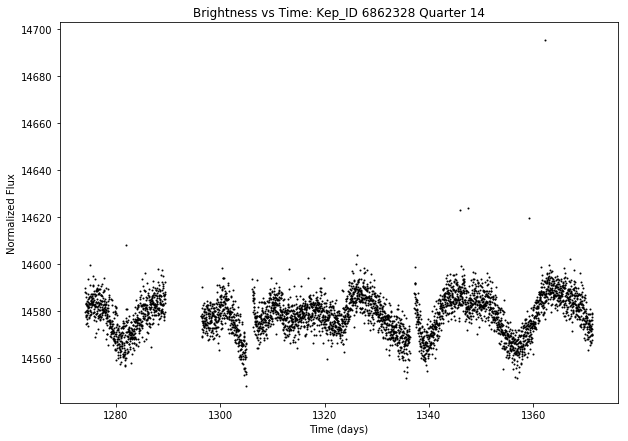

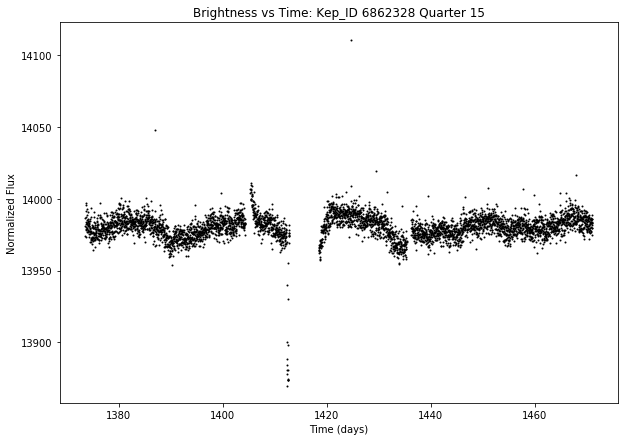

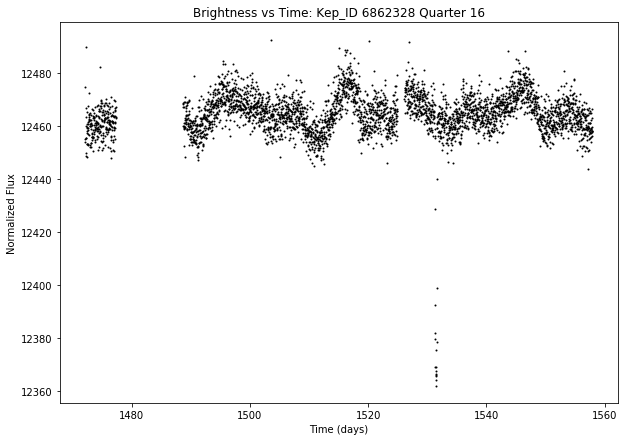

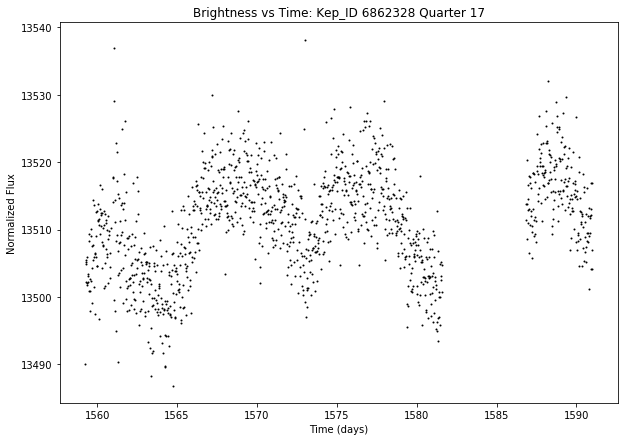

In [4]:
# Plotting all quarters of K_686
i=0
while i < len(all_time):
    plt.figure(figsize=(10,7))
    plt.title("Brightness vs Time: Kep_ID 6862328 Quarter {}".format(i+1))
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized Flux')
    plt.plot(all_time[i],all_flux[i],".", markersize=2, color='k')
    plt.show();
    i+=1

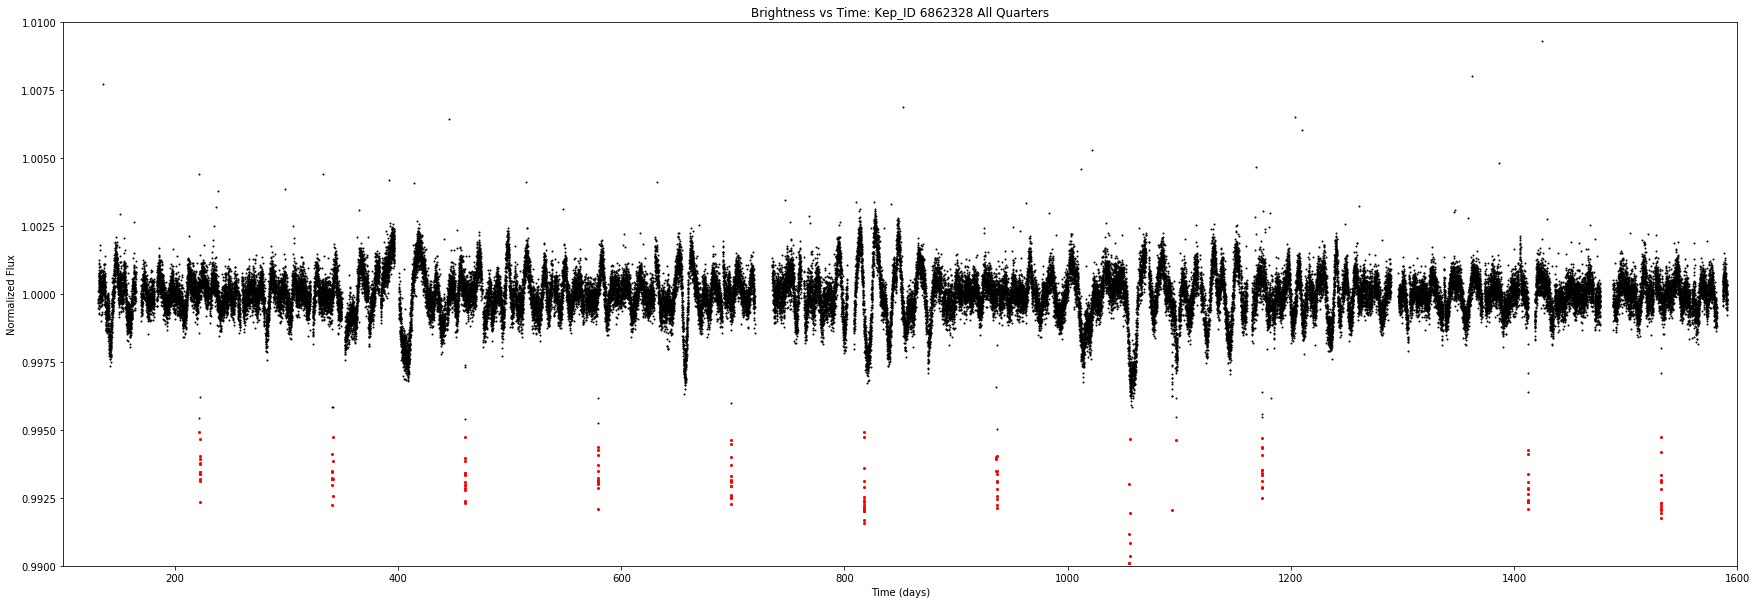

In [5]:
# Normalize all quarters with respect to overall flux median
plt.figure(figsize=(30,10))
for f in all_flux:
    f/= np.median(f)
# Stitches together all quarters into one plot
plt.title("Brightness vs Time: Kep_ID 6862328 All Quarters")
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.xlim(100,1600)
plt.ylim(0.99,1.01)
plt.plot(np.concatenate(all_time), np.concatenate(all_flux), ".", markersize=2,color='k')
#plt.xticks(np.arange(100,1700,50))
# Masks the possible transit spikes and plots them over to highlight their significance
transit_mask = np.where(np.concatenate(all_flux) < 0.995)
plt.plot(np.concatenate(all_time)[transit_mask],np.concatenate(all_flux)[transit_mask],"o",markersize=2,color='r')

plt.show()

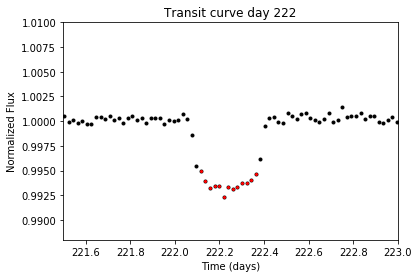

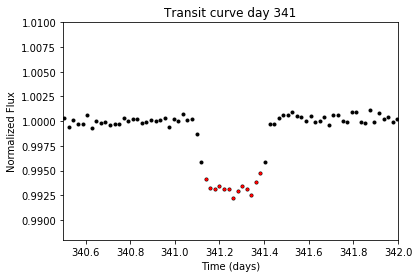

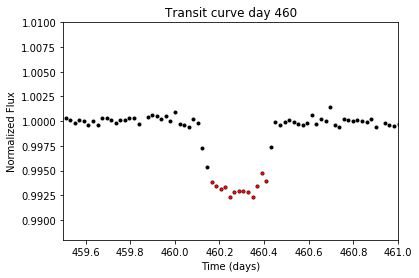

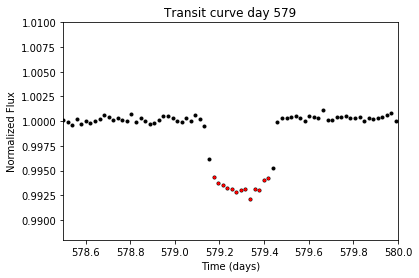

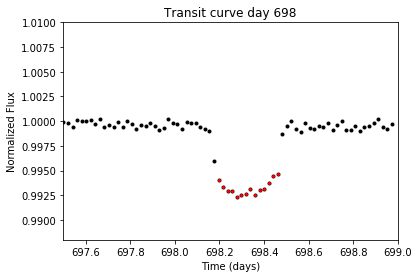

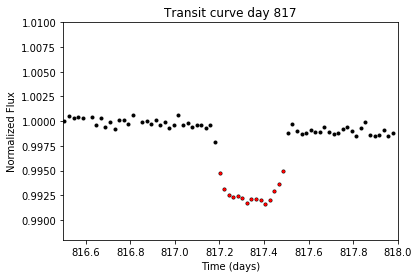

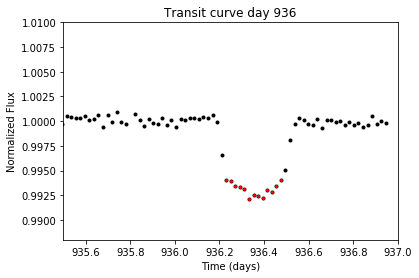

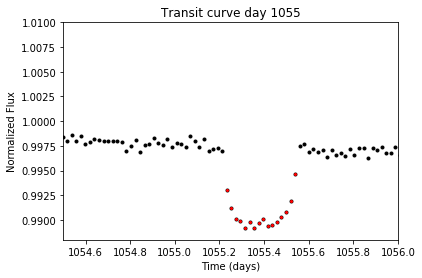

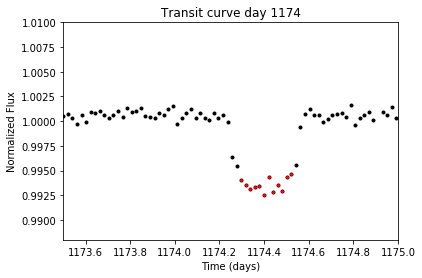

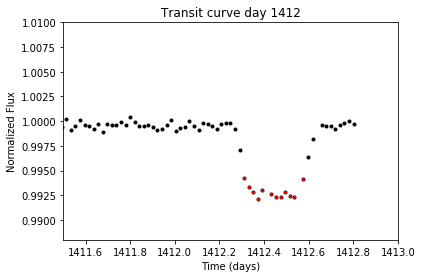

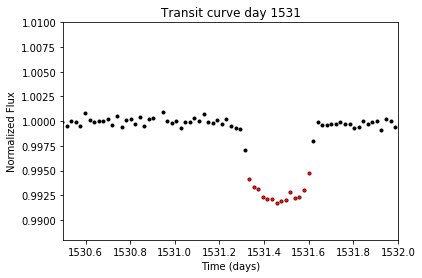

In [13]:
# Days with probable transit spike
transits = [222,341,460,579,698,817,936,1055,1174,1412,1531]
# Plot local behavior at each transit spike
# plt.figure(figsize=(30,10))
for day in transits:
    plt.title("Transit curve day {}".format(day))
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized Flux')
    plt.xlim(day-.5,day+1)
    plt.ylim(0.988,1.01)
    # plt.xticks(np.arange(day-.5,day+1,1/24))
    plt.plot(np.concatenate(all_time),np.concatenate(all_flux),".",color="k")
    plt.plot(np.concatenate(all_time)[transit_mask],np.concatenate(all_flux)[transit_mask],"o",markersize=2,color='r')
    plt.show()

In [20]:
# Calculate planetary radius based on % of star's light blocked
planet_rs = []
q = 0
while q < len(all_flux):
    r_planet = R_686 * np.sqrt((np.median(all_flux[q])) - np.min(all_flux[q]))
    planet_rs.append(r_planet)
    q+=1
print(np.mean(planet_rs))


0.0551093070823


In [25]:
(np.mean(all_flux[4]) + np.median(all_flux[4])) / 2 - np.min(all_flux[4])

0.0076922774314880371

## Brigtness vs Time Kep_ID 1865864

In [69]:
file_names_186 = kepler_io.kepler_filenames(KEPLER_DATA_DIR,KEP_186)
assert file_names_186, "Failed to find .fits files in {}".format(KEPLER_DATA_DIR)
all_time_186, all_flux_186 = kepler_io.read_kepler_light_curve(file_names_186)
print("Read light curve with {} segments".format(len(all_time_186)))

Read light curve with 16 segments


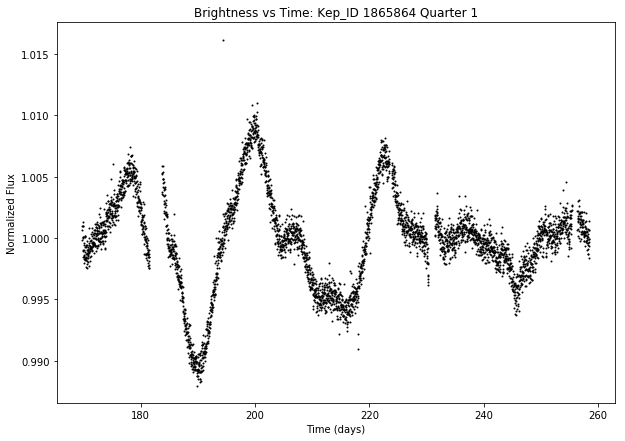

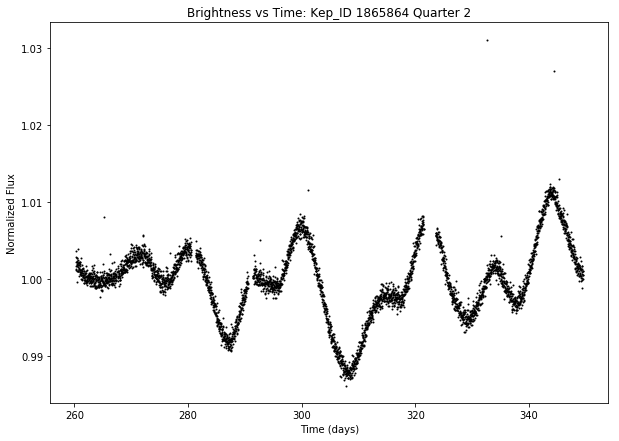

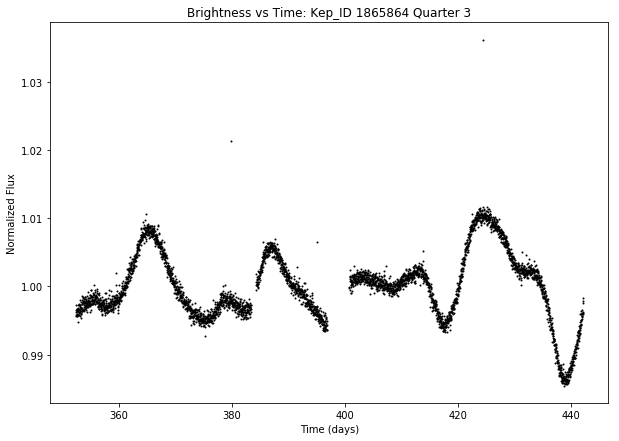

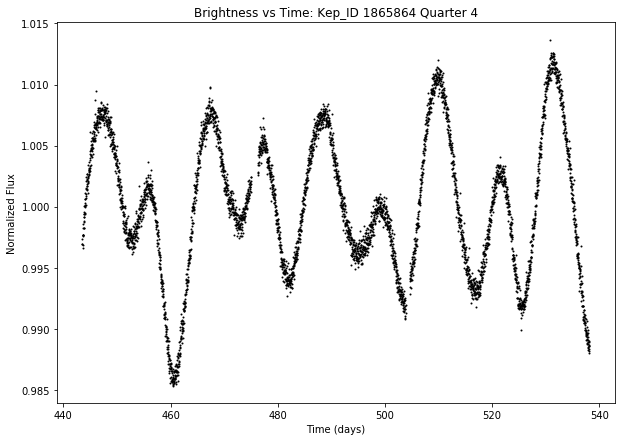

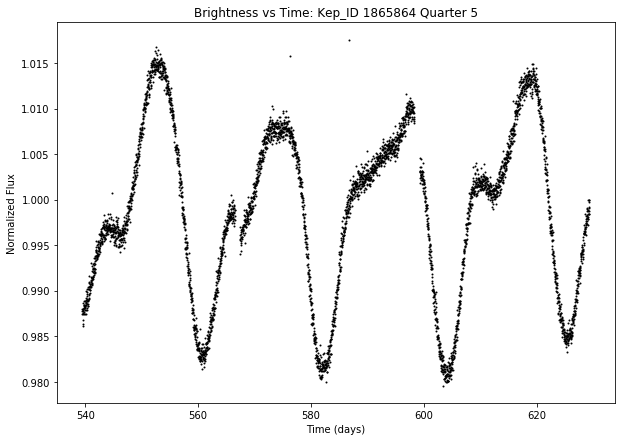

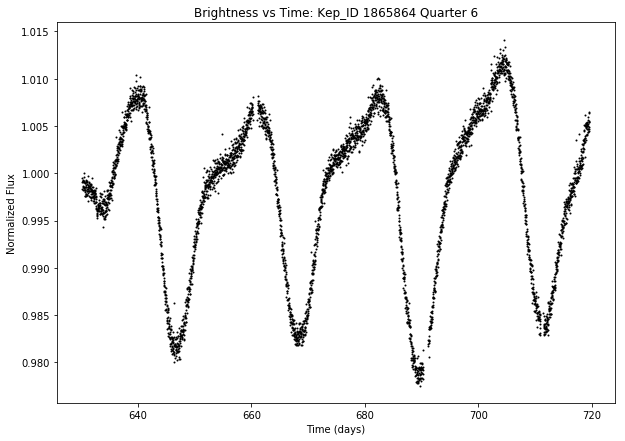

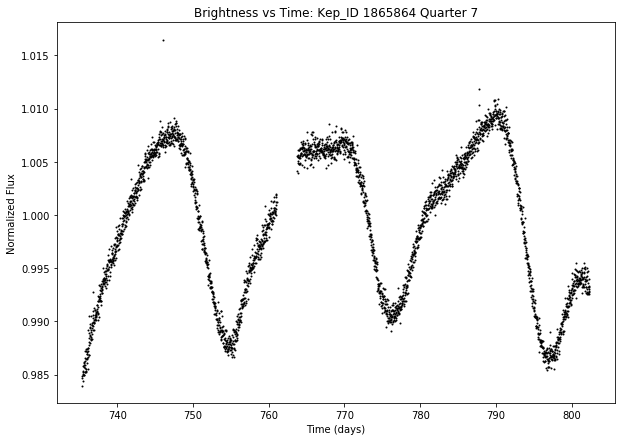

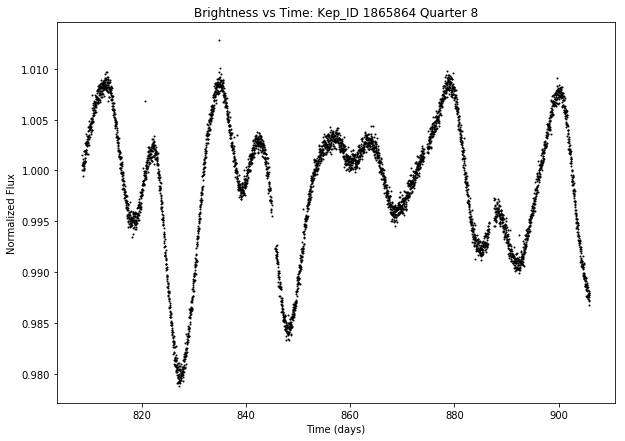

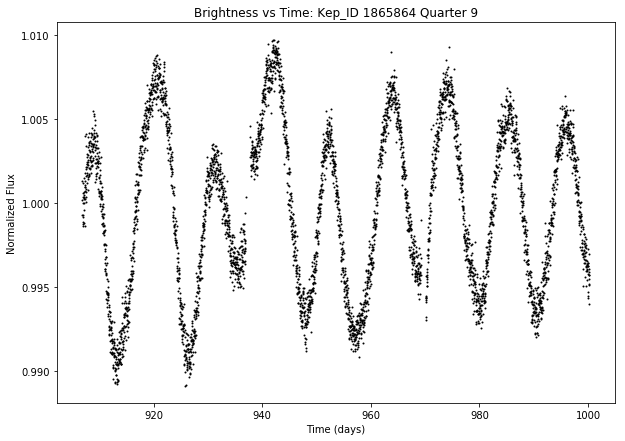

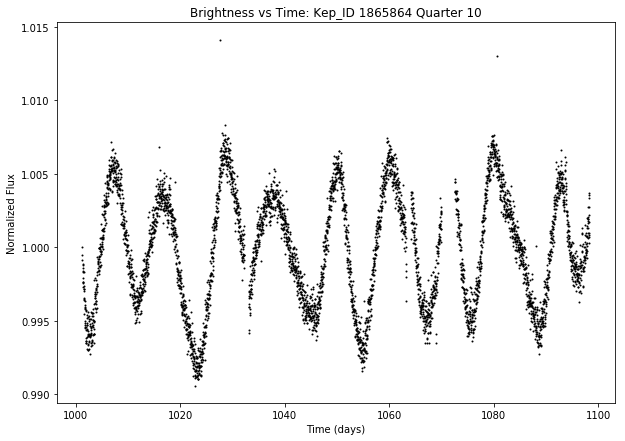

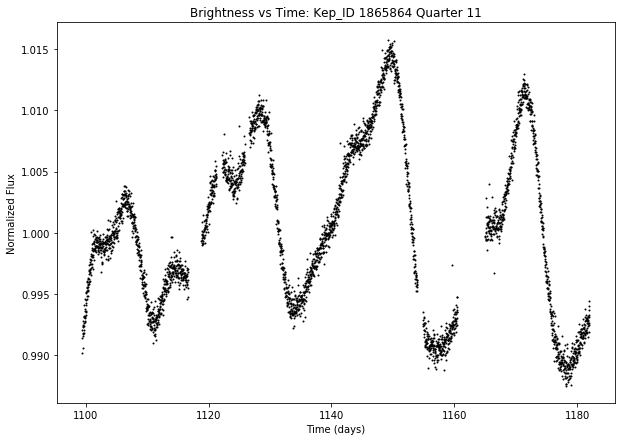

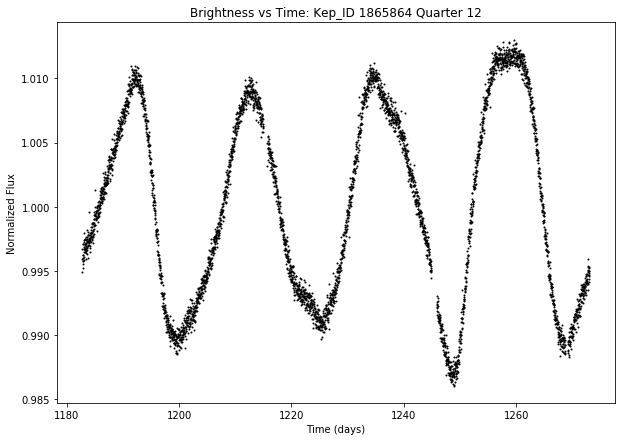

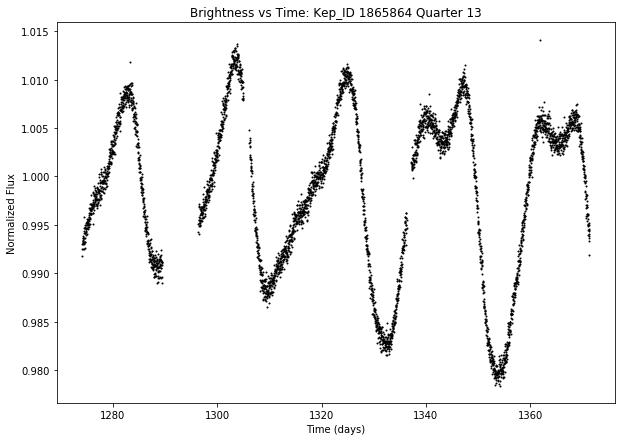

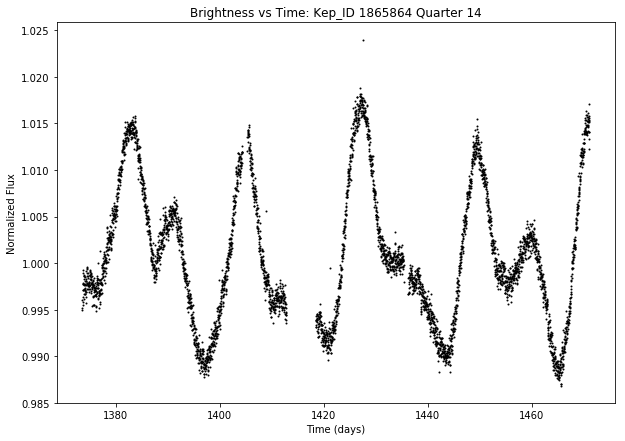

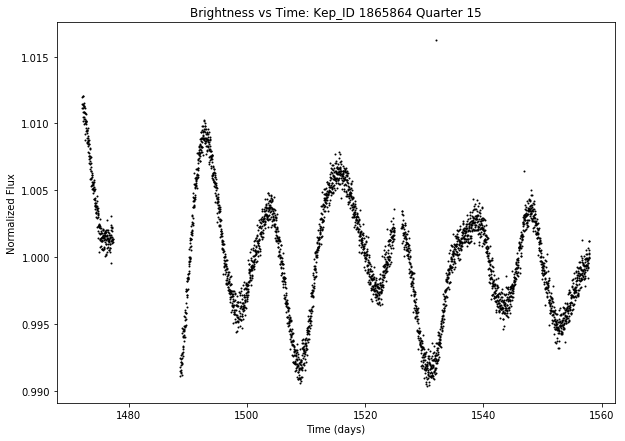

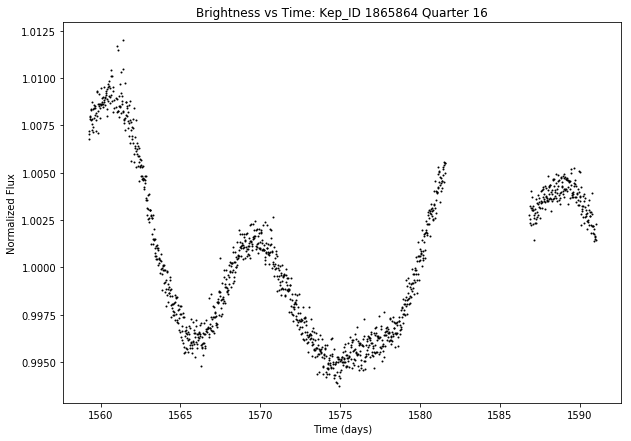

In [87]:
# Plotting all quarters of K_186
i=0
while i < len(all_time_186):
    plt.figure(figsize=(10,7))
    plt.title("Brightness vs Time: Kep_ID 1865864 Quarter {}".format(i+1))
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized Flux')
    plt.plot(all_time_186[i],all_flux_186[i],".", markersize=2, color='k')
    plt.show()
    i+=1

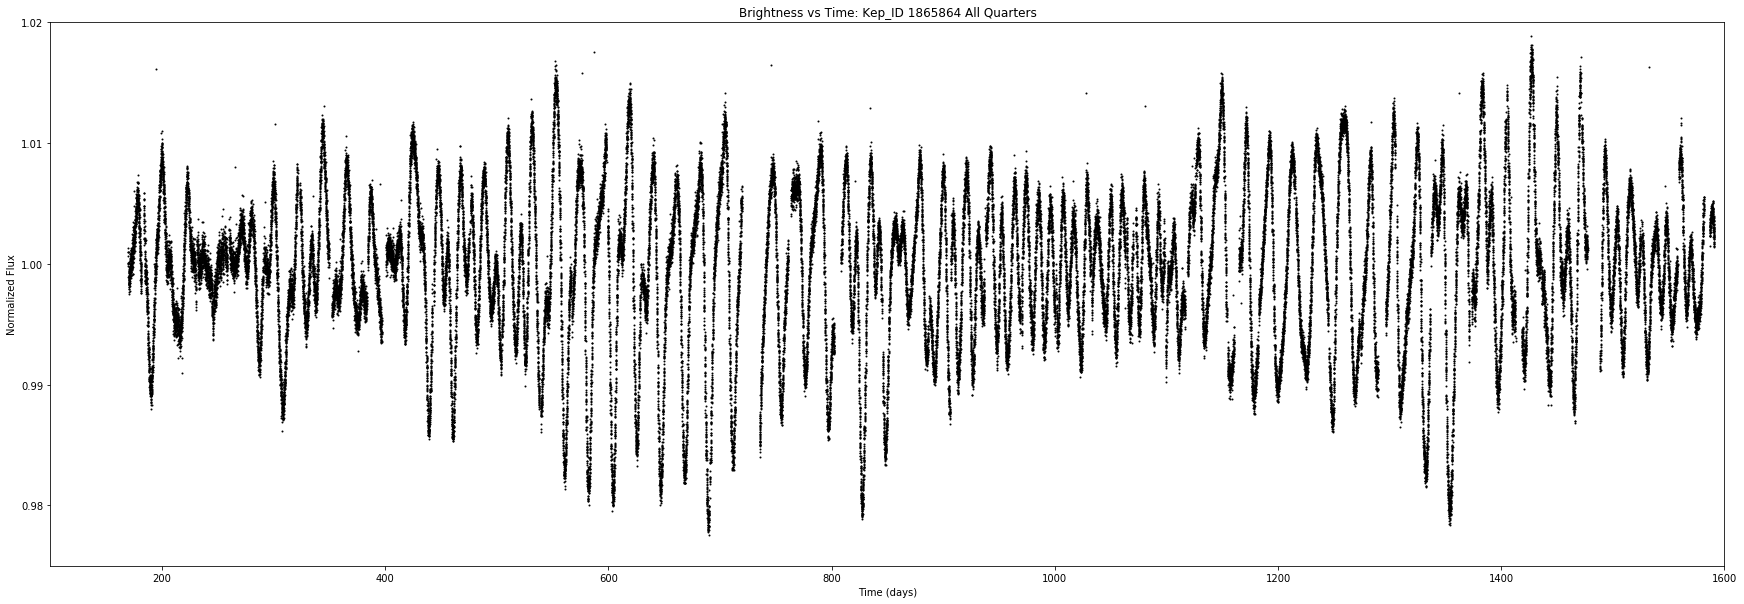

In [131]:
# Normalize all quarters with respect to overall flux median
plt.figure(figsize=(30,10))
for f in all_flux_186:
    f/= np.median(f)
# Stitches together all quarters into one plot
plt.title("Brightness vs Time: Kep_ID 1865864 All Quarters")
plt.plot(np.concatenate(all_time_186), np.concatenate(all_flux_186), ".", markersize=2,color='k')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.xlim(100,1600)
plt.ylim(0.975,1.02)
plt.show()